### Data Pre-Processing
#### Importing Libraries and Dataset

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Sentiment Package
from textblob import TextBlob

In [3]:
# Load the data 
df = pd.read_csv("drugsComTrain_raw.tsv.txt",sep='\t')

### Dataset Analysis

In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [6]:
# Missing Values
df.isnull().sum()
# Most of the missing values are in the condition column
#This implies that most people don’t know their condition by name or privacy

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [7]:
df = df.dropna()

### Drugs Analysis

In [8]:
# How many drugs do we have?
drugs = df['drugName'].unique().tolist()
drugs

['Valsartan',
 'Guanfacine',
 'Lybrel',
 'Ortho Evra',
 'Buprenorphine / naloxone',
 'Cialis',
 'Levonorgestrel',
 'Aripiprazole',
 'Keppra',
 'Ethinyl estradiol / levonorgestrel',
 'Topiramate',
 'L-methylfolate',
 'Pentasa',
 'Dextromethorphan',
 'Nexplanon',
 'Liraglutide',
 'Trimethoprim',
 'Amitriptyline',
 'Lamotrigine',
 'Nilotinib',
 'Atripla',
 'Trazodone',
 'Etonogestrel',
 'Etanercept',
 'Tioconazole',
 'Azithromycin',
 'Eflornithine',
 'Daytrana',
 'Ativan',
 'Imitrex',
 'Sertraline',
 'Toradol',
 'Viberzi',
 'Mobic',
 'Dulcolax',
 'Morphine',
 'MoviPrep',
 'Trilafon',
 'Fluconazole',
 'Contrave',
 'Clonazepam',
 'Metaxalone',
 'Venlafaxine',
 'Ledipasvir / sofosbuvir',
 'Symbyax',
 'Tamsulosin',
 'Doxycycline',
 'Dulaglutide',
 'Intuniv',
 'Buprenorphine',
 'Qvar',
 'Opdivo',
 'Pyridium',
 'Latuda',
 'Bupropion',
 'Implanon',
 'Effexor XR',
 'Drospirenone / ethinyl estradiol',
 'NuvaRing',
 'Prepopik',
 'Tretinoin',
 'Gildess Fe 1 / 20',
 'Ethinyl estradiol / norgestimate'

In [9]:
#How many drugs do we have?
len(drugs)

3431

In [10]:
# What is the most popular drug?
df['drugName'].value_counts()

Levonorgestrel                       3631
Etonogestrel                         3321
Ethinyl estradiol / norethindrone    2750
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2033
                                     ... 
Mylanta Gas                             1
Histrelin                               1
AirDuo Respiclick                       1
Clarinex-D 12 Hour                      1
Hydrochlorothiazide / moexipril         1
Name: drugName, Length: 3431, dtype: int64

In [11]:
# What is the most popular drug?
# Top 20 Drugs (Most Popular)
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3631
Etonogestrel                          3321
Ethinyl estradiol / norethindrone     2750
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2033
Ethinyl estradiol / levonorgestrel    1809
Phentermine                           1538
Sertraline                            1353
Escitalopram                          1287
Mirena                                1242
Implanon                              1102
Gabapentin                            1042
Bupropion                             1017
Venlafaxine                           1012
Miconazole                             998
Citalopram                             994
Medroxyprogesterone                    971
Lexapro                                952
Bupropion / naltrexone                 945
Duloxetine                             931
Name: drugName, dtype: int64

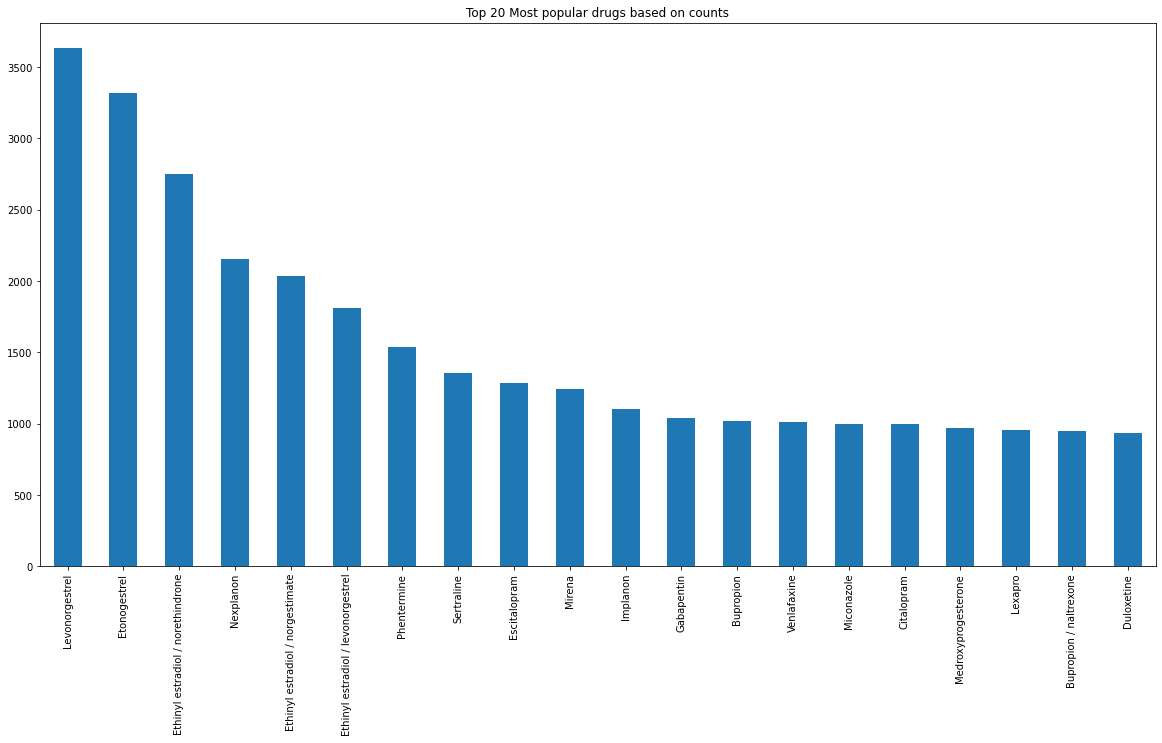

In [12]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

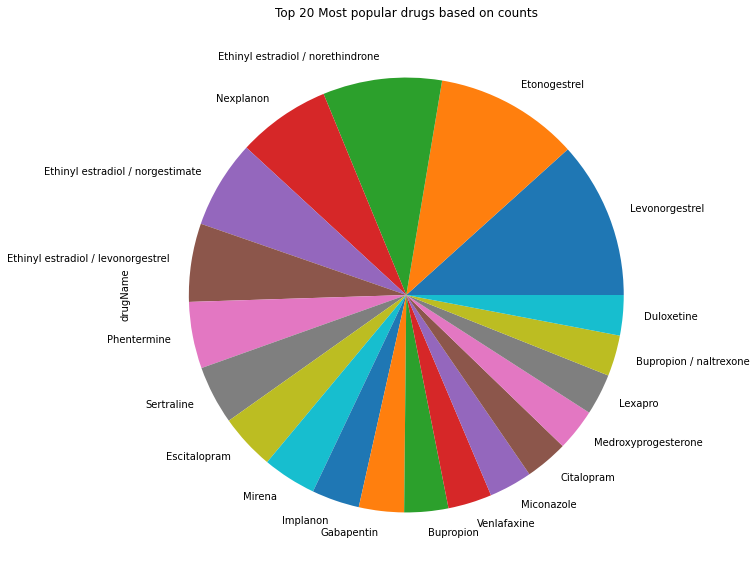

In [13]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='pie')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

In [14]:
# Least 20 Drugs (Most Popular)
df['drugName'].value_counts().nsmallest(20)

Advil PM                1
Dasetta 7 / 7 / 7       1
Refresh Liquigel        1
BroveX PEB DM           1
Novolin N               1
Natesto                 1
Aldactazide             1
Excedrin Back & Body    1
Phentride               1
Flunisolide             1
Belladonna              1
Pancreaze               1
Smoothie Readi-Cat 2    1
Ed A-Hist               1
Acetic acid             1
Omnipaque 350           1
Fragmin                 1
Peganone                1
Zyrtec-D                1
Sulfinpyrazone          1
Name: drugName, dtype: int64

<AxesSubplot:>

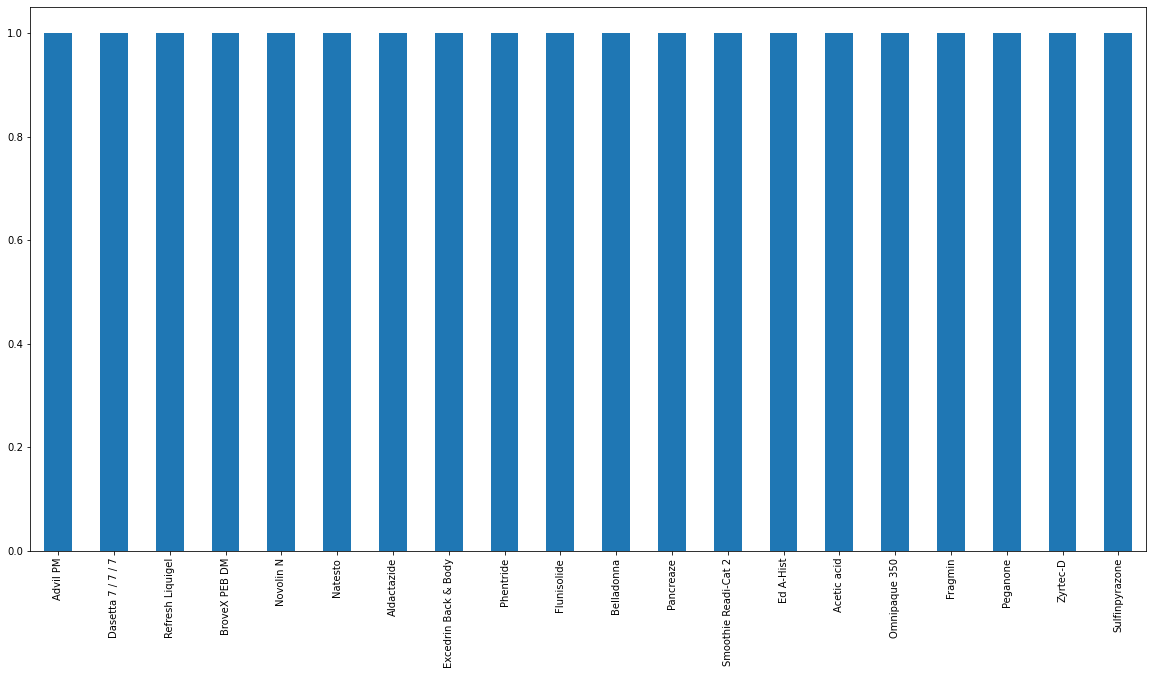

In [15]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nsmallest(20).plot(kind='bar')

<AxesSubplot:ylabel='drugName'>

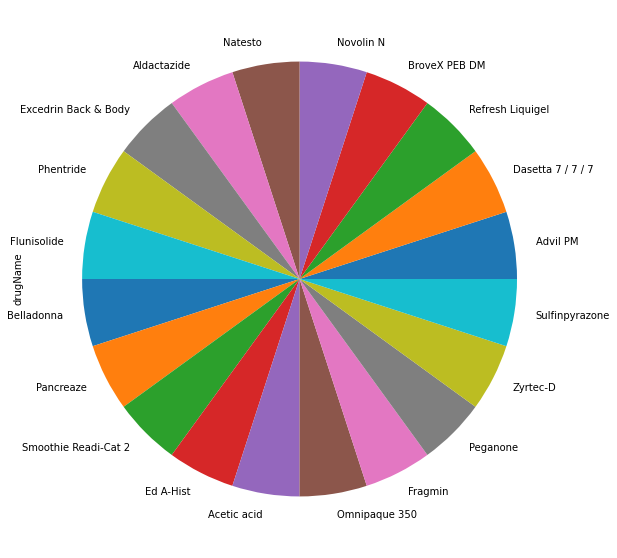

In [16]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nsmallest(20).plot(kind='pie')

In [17]:
# Classifying drugs according to their groups. Each drug belongs to a group. To do that we collected information 
# from google and got the following: 

In [18]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [19]:
# We will create a function that compares the end of the drug name to the keys found in the above list, and it will
# detect the group of the drug according to that. 
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return(drug_suffix[i])

In [20]:
# Trying the function
classify_drug('Valsartan')

'arb blocker'

In [21]:
classify_drug('losartan')

'arb blocker'

In [22]:
# Create a new column in the dataset ( drug_class), it is classify_drug functions applied to drug name column.
df['drug_class'] = df['drugName'].apply(classify_drug)

In [23]:
df[['drugName','drug_class']]
# Some of them are None because we limited our dictionary. 

,drugName,drug_class
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


In [24]:
# How many Groups of Drugs By Class
df['drug_class'].unique().tolist()

['arb blocker',
 None,
 'antifungal (except metronidazole)',
 'oral hypoglycemics',
 'opiod analgesics',
 'antibiotic',
 'anti-anxiety',
 'h2 blockers (anti-ulcers)',
 'beta blockers',
 'ace inhibitor',
 'thrombolytics',
 'alpha blocker',
 'corticosteroid (prednisone)',
 'antipyschotics (phenothiazine)',
 'antibiotic(penicillins)',
 'barbiturate',
 'calcium channel blocker',
 'anesthetic',
 'pituitary hormone',
 'antibiotic (cephalosporins)',
 'beta blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [25]:
# How many Groups of Drugs By Class
len(df['drug_class'].unique().tolist())

23

In [26]:
# Which of class of drug  is the most commonest
df['drug_class'].value_counts()

antifungal (except metronidazole)    4190
opiod analgesics                     3907
oral hypoglycemics                   3537
antibiotic                           3394
anti-anxiety                         2625
h2 blockers (anti-ulcers)            1221
beta blockers                         965
corticosteroid (prednisone)           877
antipyschotics (phenothiazine)        660
arb blocker                           556
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      27
barbiturate                            19
anticoagulants                          8
Name: drug_class, dtype: int64

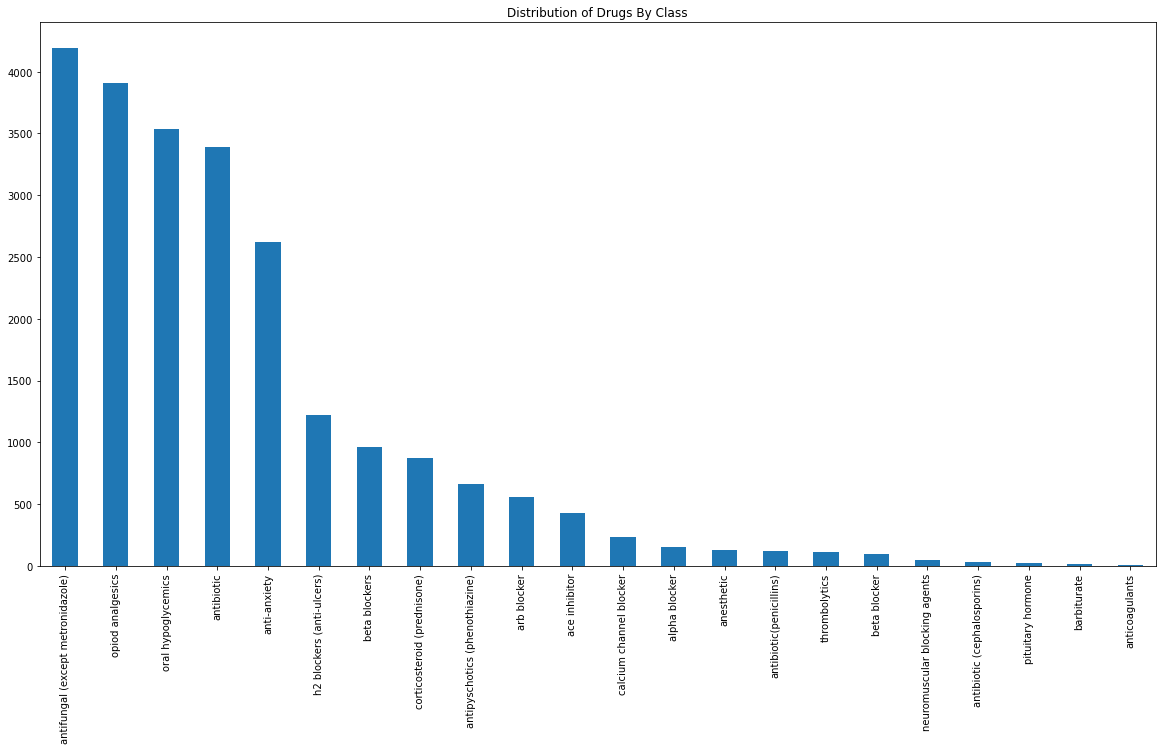

In [27]:
# Which of class of drug  is the most commonest
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().plot(kind='bar')
plt.title("Distribution of Drugs By Class")
plt.show()

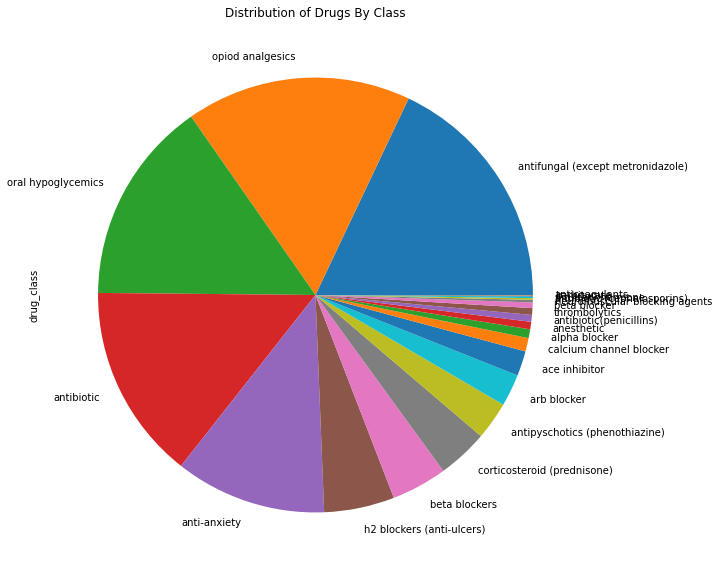

In [28]:
# Which of class of drug  is the most commonest
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().plot(kind='pie')
plt.title("Distribution of Drugs By Class")
plt.show()

### Conditions Analysis

In [29]:
conditions =df['condition'].unique().tolist()
conditions

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Opiate Dependence',
 'Benign Prostatic Hyperplasia',
 'Emergency Contraception',
 'Bipolar Disorde',
 'Epilepsy',
 'Migraine Prevention',
 'Depression',
 "Crohn's Disease",
 'Cough',
 'Obesity',
 'Urinary Tract Infection',
 'ibromyalgia',
 'Chronic Myelogenous Leukemia',
 'HIV Infection',
 'Insomnia',
 'Rheumatoid Arthritis',
 'Vaginal Yeast Infection',
 'Chlamydia Infection',
 'Hirsutism',
 'Panic Disorde',
 'Migraine',
 'Pain',
 'Irritable Bowel Syndrome',
 'Osteoarthritis',
 'Constipation',
 'Bowel Preparation',
 'Psychosis',
 'Muscle Spasm',
 'Hepatitis C',
 'Overactive Bladde',
 'Diabetes, Type 2',
 'Asthma, Maintenance',
 'Non-Small Cell Lung Cance',
 'Schizophrenia',
 'Dysuria',
 'Smoking Cessation',
 'Anxiety',
 'Acne',
 'emale Infertility',
 'Constipation, Acute',
 'Constipation, Drug Induced',
 'Erectile Dysfunction',
 'Trigeminal Neuralgia',
 'Underactive Thyroid',
 'Chronic Pain',
 'Atrophic Vaginitis',
 'Skin an

In [30]:
len(conditions)
# We conclude from the below results that we have 885 different conditions for our dataset. 

884

In [31]:
# Most common conditions
df['condition'].value_counts()

Birth Control                                   28788
Depression                                       9069
Pain                                             6145
Anxiety                                          5904
Acne                                             5588
                                                ...  
Aspergillosis, Aspergilloma                         1
Upper Limb Spasticity                               1
Reversal of Nondepolarizing Muscle Relaxants        1
Occipital Neuralgia                                 1
Wilson's Disease                                    1
Name: condition, Length: 884, dtype: int64

<AxesSubplot:>

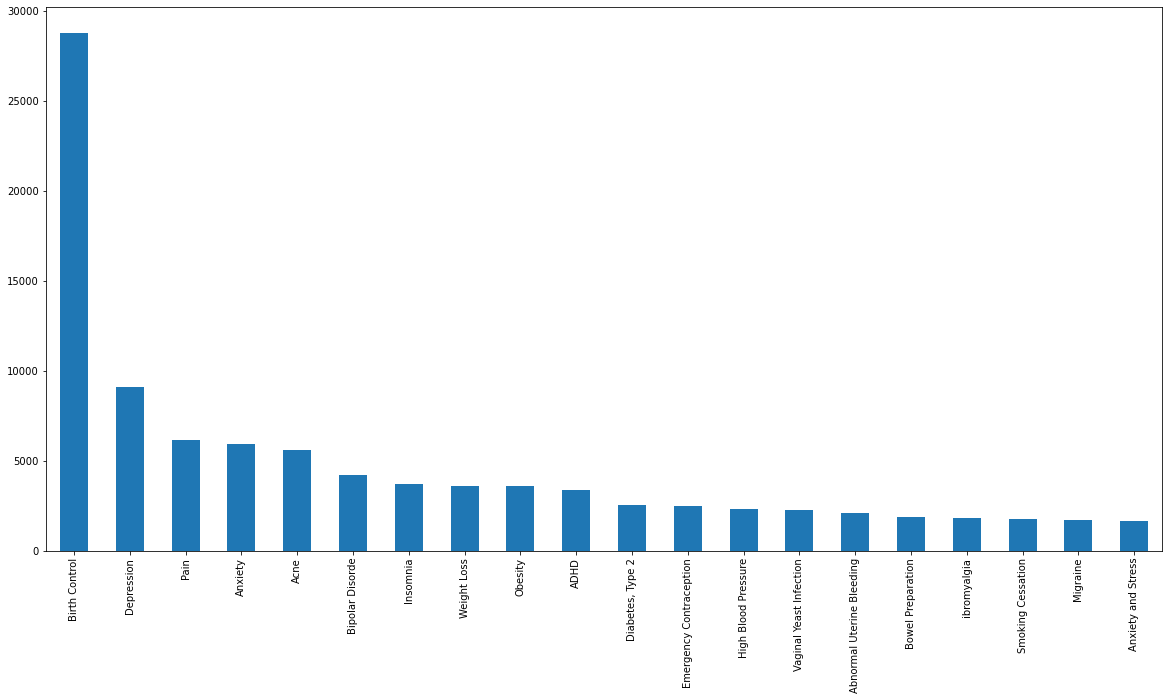

In [32]:
# plotting most 20 common conditions 
plt.figure(figsize=(20,10))
df['condition'].value_counts().nlargest(20).plot(kind ='bar')

In [33]:
# Least common conditions:
df['condition'].value_counts().nsmallest(20)

Secondary Cutaneous Bacterial Infections       1
Parkinsonian Trem                              1
Cluster-Tic Syndrome                           1
Somatoform Pain Disorde                        1
Amyotrophic Lateral Sclerosis                  1
Coccidioidomycosis                             1
54</span> users found this comment helpful.    1
Pseudogout, Prophylaxis                        1
92</span> users found this comment helpful.    1
Neutropenia                                    1
Dermatitis Herpetiformis                       1
26</span> users found this comment helpful.    1
Mumps Prophylaxis                              1
Thyroid Suppression Test                       1
Neuritis                                       1
63</span> users found this comment helpful.    1
m Pain Disorde                                 1
Dercum's Disease                               1
Neoplastic Diseases                            1
Epicondylitis, Tennis Elbow                    1
Name: condition, dty

<AxesSubplot:>

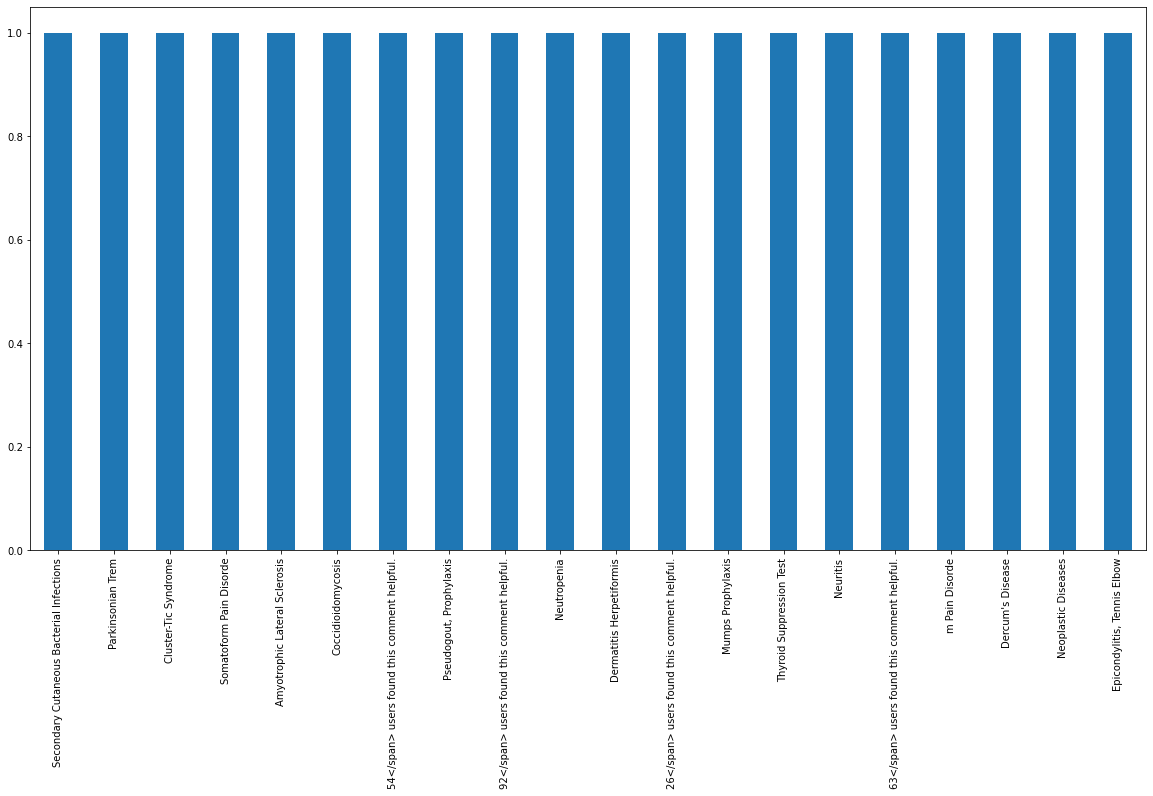

In [34]:
# plotting least 20 common conditions 
plt.figure(figsize=(20,10))
df['condition'].value_counts().nsmallest(20).plot(kind ='bar')

### Drugs and Conditions Analysis

In [35]:
# Determining the number of drugs per each condition: 
# How many condition has the same drug name: 
df.groupby('condition')['drugName'].nunique().nlargest(20)

condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

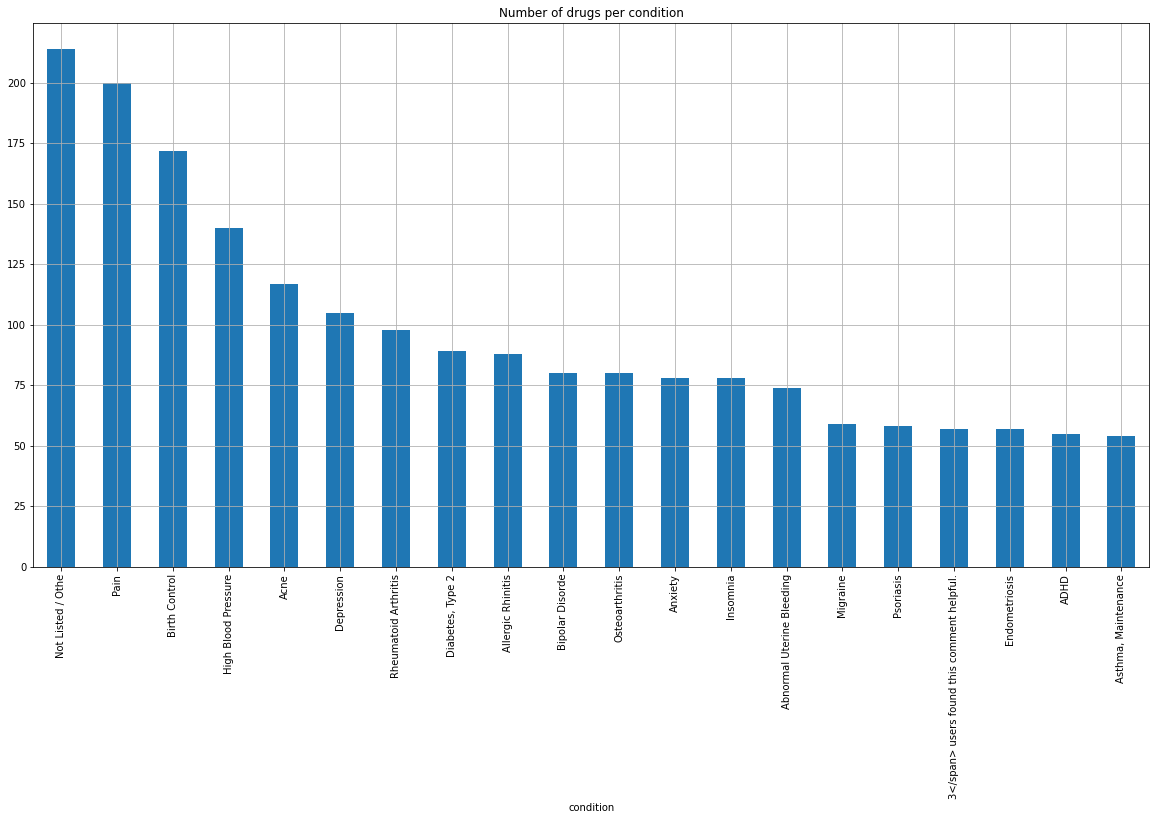

In [36]:
plt.figure(figsize=(20,10))
df.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar')
plt.title("Number of drugs per condition")
plt.grid()
plt.show()

In [37]:
# Distribution of Drugs Per Drug Group based on size
drug_groups = df.groupby('drug_class').size()

In [38]:
type(drug_groups)

pandas.core.series.Series

In [39]:
# Convert to DF
drug_groups_df= pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})
drug_groups_df

,drug_class,counts
0,ace inhibitor,432
1,alpha blocker,153
2,anesthetic,129
3,anti-anxiety,2625
4,antibiotic,3394
5,antibiotic (cephalosporins),29
6,antibiotic(penicillins),119
7,anticoagulants,8
8,antifungal (except metronidazole),4190
9,antipyschotics (phenothiazine),660


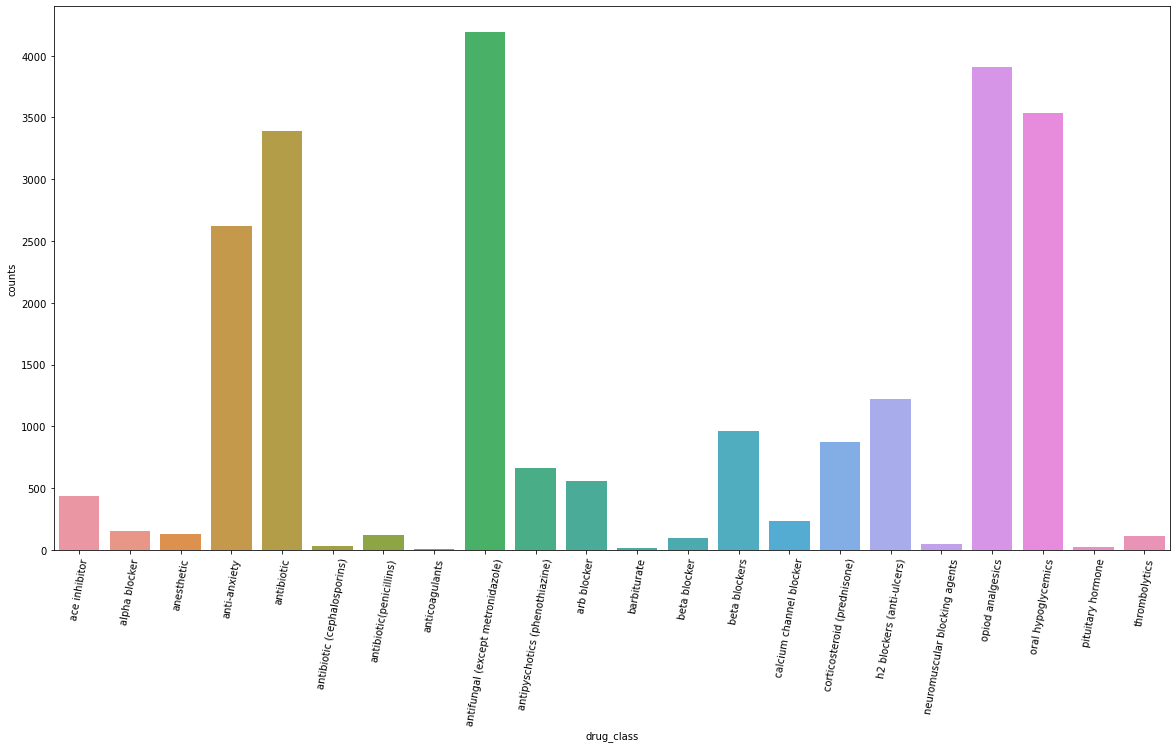

In [40]:
# Seaborn Plot
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
plt.xticks(rotation=80)
plt.show()

### Rating Analysis

In [41]:
df.groupby('rating').size()

rating
1.0     21504
2.0      6879
3.0      6465
4.0      4980
5.0      7959
6.0      6301
7.0      9395
8.0     18791
9.0     27379
10.0    50745
dtype: int64

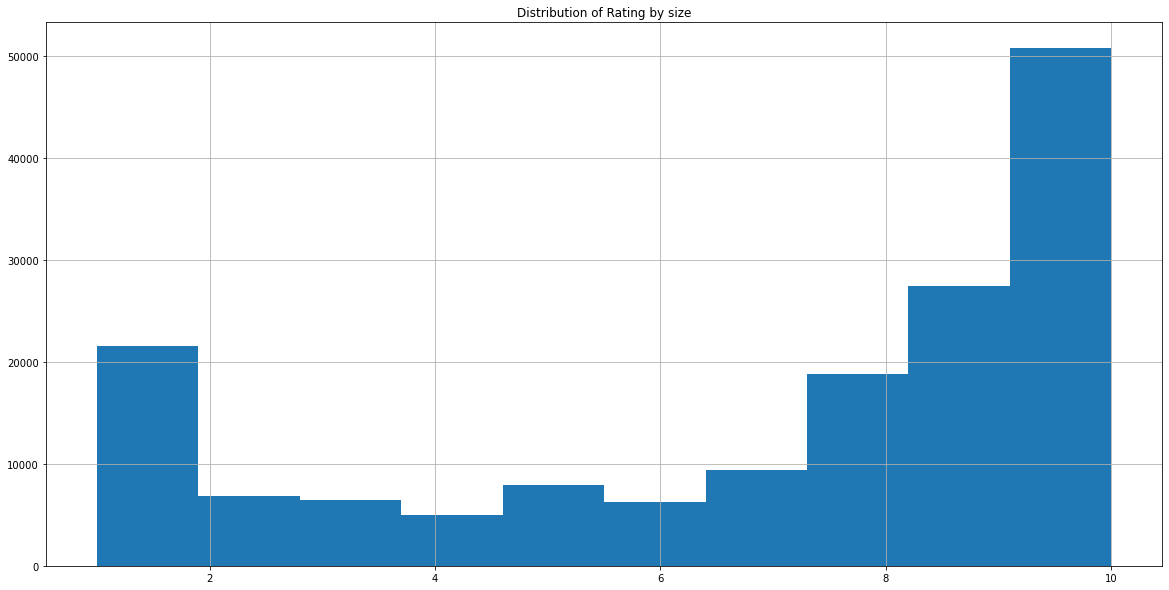

In [42]:
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.title('Distribution of Rating by size')
plt.show()

In [43]:
# Average Rating of Drugs
avg_rating = (df['rating'].groupby(df['drugName']).mean())
avg_rating.tail()

drugName
Zyvox                    9.000000
ZzzQuil                  2.500000
depo-subQ provera 104    1.000000
ella                     6.980392
femhrt                   4.000000
Name: rating, dtype: float64

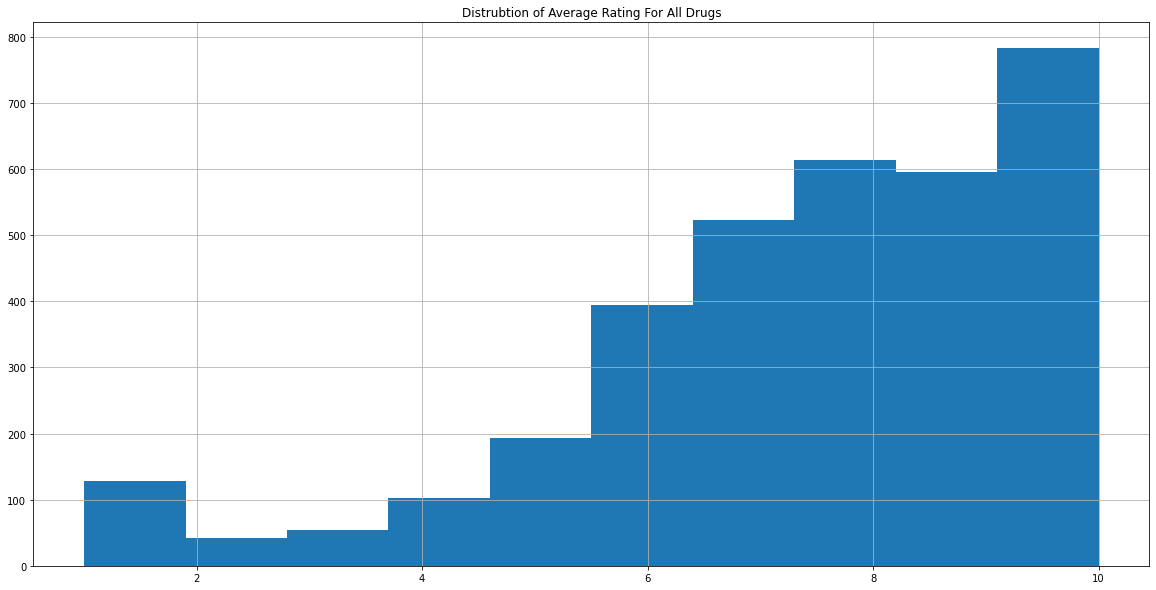

In [44]:
# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs")
plt.show()

In [45]:
# Average Rating of Drugs By Class
avg_rating_per_drug_class = (df['rating'].groupby(df['drug_class']).mean())
avg_rating_per_drug_class

drug_class
ace inhibitor                        5.759259
alpha blocker                        6.954248
anesthetic                           5.937984
anti-anxiety                         8.543619
antibiotic                           6.502357
antibiotic (cephalosporins)          6.344828
antibiotic(penicillins)              7.033613
anticoagulants                       9.125000
antifungal (except metronidazole)    5.575418
antipyschotics (phenothiazine)       7.145455
arb blocker                          6.453237
barbiturate                          8.894737
beta blocker                         6.587629
beta blockers                        7.681865
calcium channel blocker              5.725322
corticosteroid (prednisone)          7.464082
h2 blockers (anti-ulcers)            7.278460
neuromuscular blocking agents        8.622222
opiod analgesics                     7.447146
oral hypoglycemics                   7.266327
pituitary hormone                    8.444444
thrombolytics          

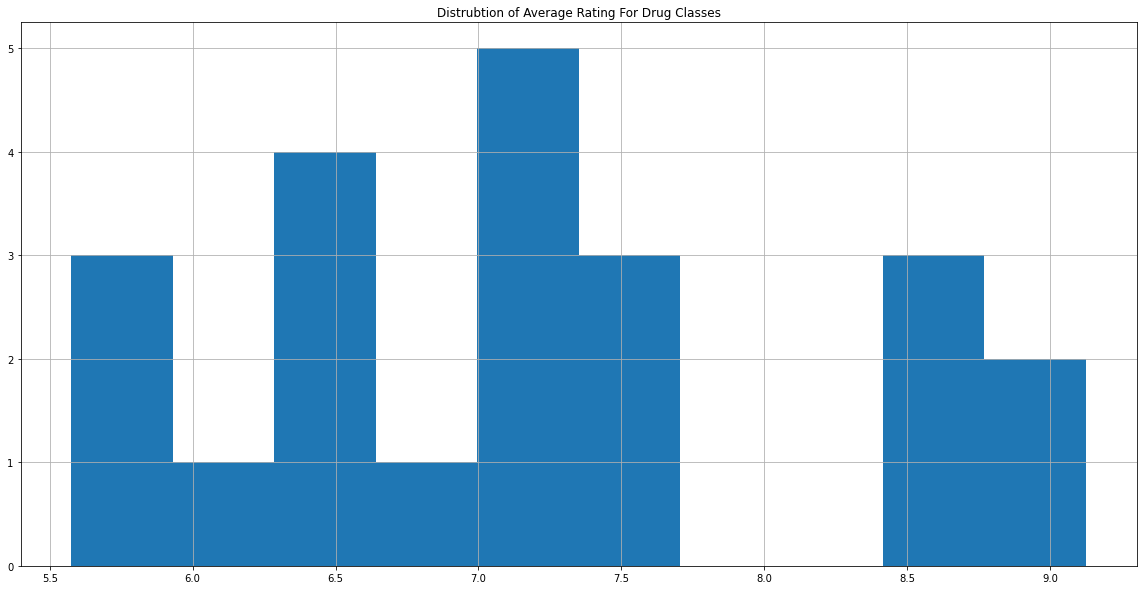

In [46]:
# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating_per_drug_class.hist()
plt.title("Distrubtion of Average Rating For Drug Classes")
plt.show()

In [47]:
# Which Group of Drugs have the higest mean/average rating
avg_rating_per_drug_class.nlargest(20)

drug_class
anticoagulants                    9.125000
barbiturate                       8.894737
neuromuscular blocking agents     8.622222
anti-anxiety                      8.543619
pituitary hormone                 8.444444
beta blockers                     7.681865
corticosteroid (prednisone)       7.464082
opiod analgesics                  7.447146
h2 blockers (anti-ulcers)         7.278460
oral hypoglycemics                7.266327
antipyschotics (phenothiazine)    7.145455
thrombolytics                     7.103448
antibiotic(penicillins)           7.033613
alpha blocker                     6.954248
beta blocker                      6.587629
antibiotic                        6.502357
arb blocker                       6.453237
antibiotic (cephalosporins)       6.344828
anesthetic                        5.937984
ace inhibitor                     5.759259
Name: rating, dtype: float64

In [48]:
# Which Drugs have the higest mean/average rating
avg_rating.nlargest(20)

drugName
A + D Cracked Skin Relief                               10.0
A / B Otic                                              10.0
Absorbine Jr.                                           10.0
Accolate                                                10.0
Acetaminophen / caffeine / magnesium salicylate         10.0
Acetaminophen / dexbrompheniramine / pseudoephedrine    10.0
Acetaminophen / phenylephrine                           10.0
Acetaminophen / pseudoephedrine                         10.0
Acetic acid / antipyrine / benzocaine / polycosanol     10.0
Acrivastine / pseudoephedrine                           10.0
Acyclovir / hydrocortisone                              10.0
Advil Cold and Sinus Liqui-Gels                         10.0
Aerobid-M                                               10.0
Afrin 4 Hour Extra Moisturizing                         10.0
Ala-Quin                                                10.0
Alavert                                                 10.0
Aldactazide    

### UsefulCount Analysis

In [49]:
# USefulCount is the number of people who benefited from the review 
# We want to know how genuine is the review. 
# To do that, we will apply sentimental analysis to know whether the review is positive or negative

### Sentimental Analysis 

In [50]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [51]:
# Sentiment Score for Review
df['sentiment'] = df['review'].apply(get_sentiment)

In [52]:
# Sentiment Labels for Review
df['sentiment_label'] = df['review'].apply(get_sentiment_label)

In [53]:
df[['review','sentiment','sentiment_label']] 

,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,neutral
1,"""My son is halfway through his fourth week of ...",0.168333,positive
2,"""I used to take another oral contraceptive, wh...",0.067210,positive
3,"""This is my first time using any form of birth...",0.179545,positive
4,"""Suboxone has completely turned my life around...",0.194444,positive
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",0.262917,positive
161293,"""I was given this in IV before surgey. I immed...",-0.276389,negative
161294,"""Limited improvement after 4 months, developed...",-0.223810,negative
161295,"""I&#039;ve been on thyroid medication 49 years...",0.212597,positive


In [54]:
# How many positive and negative and neutral reviews?
df['sentiment_label'].value_counts()

positive    100456
negative     53030
neutral       6912
Name: sentiment_label, dtype: int64

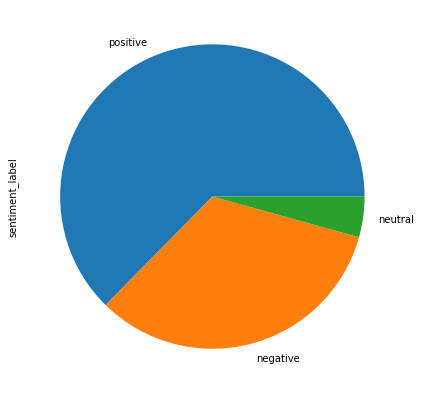

In [55]:
# How many positive and negative and neutral reviews?
plt.figure(figsize=(7,7))
df['sentiment_label'].value_counts().plot(kind='pie')
plt.show()

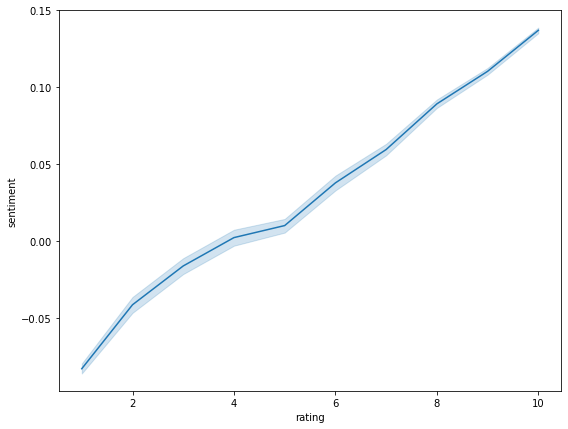

In [56]:
#### Correlation Between Our sentiment and rating
plt.figure(figsize=(9,7))
sns.lineplot(data=df,x='rating',y='sentiment')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='sentiment'>

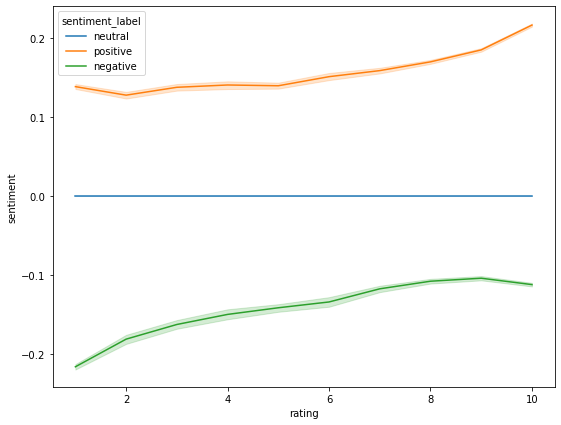

In [57]:
# Correlation  btween rating and sentiment
plt.figure(figsize=(9,7))
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')

In [58]:
import string
import nltk
import re
from nltk.tokenize import word_tokenize

In [59]:
# Convert to lower case:
df['review'] = df['review'].astype(str).str.lower()

In [60]:
# remove punctuations:
def remove_puncts(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['review'] = df['review'].apply(lambda x: remove_puncts(x))
df['review'].head()

0    it has no side effect i take it in combination...
1    my son is halfway through his fourth week of i...
2    i used to take another oral contraceptive whic...
3    this is my first time using any form of birth ...
4    suboxone has completely turned my life around ...
Name: review, dtype: object

In [61]:
def tokenize_data(df):
    df['review'] = df['review'].astype(str).apply(word_tokenize)
    return df

tokenize_data(df)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
0,206461,Valsartan,Left Ventricular Dysfunction,"[it, has, no, side, effect, i, take, it, in, c...",9.0,"May 20, 2012",27,arb blocker,0.000000,neutral
1,95260,Guanfacine,ADHD,"[my, son, is, halfway, through, his, fourth, w...",8.0,"April 27, 2010",192,None,0.168333,positive
2,92703,Lybrel,Birth Control,"[i, used, to, take, another, oral, contracepti...",5.0,"December 14, 2009",17,None,0.067210,positive
3,138000,Ortho Evra,Birth Control,"[this, is, my, first, time, using, any, form, ...",8.0,"November 3, 2015",10,None,0.179545,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"[suboxone, has, completely, turned, my, life, ...",9.0,"November 27, 2016",37,None,0.194444,positive
...,...,...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"[i, wrote, my, first, report, in, midoctober, ...",10.0,"May 31, 2015",125,None,0.262917,positive
161293,127085,Metoclopramide,Nausea/Vomiting,"[i, was, given, this, in, iv, before, surgey, ...",1.0,"November 1, 2011",34,oral hypoglycemics,-0.276389,negative
161294,187382,Orencia,Rheumatoid Arthritis,"[limited, improvement, after, months, develope...",2.0,"March 15, 2014",35,None,-0.223810,negative
161295,47128,Thyroid desiccated,Underactive Thyroid,"[ive, been, on, thyroid, medication, years, i,...",10.0,"September 19, 2015",79,None,0.212597,positive


In [62]:
# Remove english stop words:
from nltk.corpus import stopwords

EngStopWords = stopwords.words('English')

def remove_stopwords(text):
    text = [word for word in text if word not in EngStopWords]
    return text
    
df['review'] = df['review'].apply(lambda x: remove_stopwords(x))
df['review'].head(10)

0    [side, effect, take, combination, bystolic, mg...
1    [son, halfway, fourth, week, intuniv, became, ...
2    [used, take, another, oral, contraceptive, pil...
3    [first, time, using, form, birth, control, im,...
4    [suboxone, completely, turned, life, around, f...
5    [nd, day, mg, started, work, rock, hard, erect...
6    [pulled, cummed, bit, took, plan, b, hours, la...
7    [abilify, changed, life, hope, zoloft, clonidi...
8    [nothing, problems, keppera, constant, shaking...
9    [pill, many, years, doctor, changed, rx, chate...
Name: review, dtype: object

In [63]:
x = df['review'].tolist()

In [64]:
 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
train_sentiments =[]
for i in df['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
train_sentiments= np.asarray(train_sentiments)
df['sentiment']=pd.Series(train_sentiments)

AttributeError: 'list' object has no attribute 'encode'

In [66]:
df[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment               
             min      mean  max
rating                         
1.0         -1.0 -0.082728  1.0
2.0         -1.0 -0.041185  0.8
3.0         -1.0 -0.015965  1.0
4.0         -1.0  0.002449  1.0
5.0         -1.0  0.010265  1.0
6.0         -1.0  0.037999  1.0
7.0         -1.0  0.059657  1.0
8.0         -1.0  0.089328  1.0
9.0         -1.0  0.110468  1.0
10.0        -1.0  0.137097  1.0

In [67]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
0,206461,Valsartan,Left Ventricular Dysfunction,"[side, effect, take, combination, bystolic, mg...",9.0,"May 20, 2012",27,arb blocker,0.000000,neutral
1,95260,Guanfacine,ADHD,"[son, halfway, fourth, week, intuniv, became, ...",8.0,"April 27, 2010",192,None,0.168333,positive
2,92703,Lybrel,Birth Control,"[used, take, another, oral, contraceptive, pil...",5.0,"December 14, 2009",17,None,0.067210,positive
3,138000,Ortho Evra,Birth Control,"[first, time, using, form, birth, control, im,...",8.0,"November 3, 2015",10,None,0.179545,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"[suboxone, completely, turned, life, around, f...",9.0,"November 27, 2016",37,None,0.194444,positive


In [68]:
# Predictions using functions and rating column: 
data = df[['drugName','condition','rating','usefulCount']]

In [69]:
data.head()

,drugName,condition,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,9.0,27
1,Guanfacine,ADHD,8.0,192
2,Lybrel,Birth Control,5.0,17
3,Ortho Evra,Birth Control,8.0,10
4,Buprenorphine / naloxone,Opiate Dependence,9.0,37


In [70]:
min_rating = data['rating'].min()
max_rating=data['rating'].max()
def scale_rating(rating):
    rating -= min_rating
    rating= rating/(max_rating -1)
    rating*= 5
    rating= int(round(rating,0))
    
    if(int(rating) == 0 or int(rating) ==1 or int(rating) ==2):
        return 0 
    else: 
        return 1 
data['eff_score']= data['rating'].apply(scale_rating)

<ipython-input-70-d00db38cec12>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['eff_score']= data['rating'].apply(scale_rating)


In [71]:
data['usefulness']= data['rating']*data['usefulCount']*data['eff_score']
data[['drugName','condition','usefulness']][data['usefulness']> data['usefulness'].mean()].sort_values(by='usefulness',ascending=False).head(10).reset_index(drop=True)

<ipython-input-71-385df9c45827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usefulness']= data['rating']*data['usefulCount']*data['eff_score']


,drugName,condition,usefulness
0,Sertraline,Depression,12910.0
1,Zoloft,Depression,12910.0
2,Levonorgestrel,Birth Control,12470.0
3,Mirena,Birth Control,12470.0
4,Zoloft,Depression,8541.0
5,Phentermine,Weight Loss,7960.0
6,Adipex-P,Weight Loss,7960.0
7,Implanon,Birth Control,7300.0
8,Viibryd,Depression,6930.0
9,Vilazodone,Depression,6930.0


In [72]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [73]:
@interact 
def check(condition = list(data['condition'].value_counts().index)):
    return data[data['condition']== condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

In [74]:
data.shape

(160398, 6)

In [75]:
x=data.drop_duplicates()

In [76]:
x.shape

(113977, 6)

In [77]:
@interact
def high_low_rate(condition= list(data['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(data[data['condition']== condition][['drugName','usefulness']].sort_values(by = 'usefulness', ascending=False).head().reset_index(drop=True))
    print("\n\n Bottom 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by= 'usefulness',ascending= True).head().reset_index(drop=True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…